
# Identify protein interactions that may be impacted by splicing of PTMs

Post translational modifications (PTMs) often facilitate protein interactions, either through direct binding of domains specific to that particular modification (e.g. SH2 domains binding to phosphorylated tyrosines) or through allosteric effects that change the conformation of the protein to either enhance or disrupt interactions. We provide functions to annotate spliced PTMs with relevant protein interactions and to identify key PTMs that may disrupt protein interaction networks.

Currently, we provide functions to process and analyze protein interaction data from PhosphoSitePlus, PTMInt, and PTMcode. We can also include enzyme-specific interactions (such as kinase substrate interactions through PhosphoSitePlus and RegPhos). First, we need to annotate the spliced PTMs with protein interactions (see rest of documentation for how to do this). Then, we can process the interactions across the different databases using the protein_interactions class to identify key PTMs that may disrupt protein interaction networks.


In [1]:
from ptm_pose import analyze, helpers


#load example differential inclusion data
spliced_ptms = helpers.load_example_data(altered_flanks = False)

interactions = analyze.protein_interactions(spliced_ptms)
interactions.get_interaction_network()

interactions.network_data.head()

/home/srcrowl/miniconda3/envs/pose_doc/lib/python3.12/site-packages/ptm_pose/pose_config.py:20: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  ptm_coordinates = pd.read_csv(resource_dir + 'ptm_coordinates.csv', dtype = {'Chromosome/scaffold name': str, 'PTM Position in Isoform': int})


PhosphoSitePlus regulatory site data found and added
Combined kinase-substrate data found and added
PTMcode data found and added


PTMInt data found and added
ELM data found and added


,Modified Gene,Interacting Gene,Residue,Type,Source,dPSI,Regulation Change
0,ABI1,ABL1,S361,INDUCES,PTMcode,0.213,+
1,ABI1,BAIAP2,S361,INDUCES,PTMcode,0.213,+
2,ABI1,CYFIP2,S361,INDUCES,PTMcode,0.213,+
3,ABI1,EPS8,S361,INDUCES,PTMcode,0.213,+
4,ABI1,EPS8L1,S361,INDUCES,PTMcode,0.213,+


We can also calculate interaction stats to identify proteins that are most impacted or relevant to spliced PTMs and the protein interaction network



In [2]:
interactions.get_interaction_stats()

interactions.network_stats.head()

,Degree,Degree Centrality,Closeness,Betweenness
ABI1,18,0.118421,0.214569,0.230725
ABL1,3,0.019737,0.175506,0.094109
BAIAP2,2,0.013158,0.165332,0.000000
CYFIP2,1,0.006579,0.162970,0.000000
EPS8,1,0.006579,0.162970,0.000000


If we want to focus on a specific protein, we can summarize information about a single protein in the network. In this case, let's look at TSC2, which loses pS981 upon ESRP1 knockdown



In [3]:
interactions.summarize_protein_network(protein = 'TSC2')

Decreased interaction likelihoods: AKT1, YWHAE, YWHAZ
Number of interactions: 3 (Rank: 17)
Centrality measures - 	 Degree = 0.019736842105263157 (Rank: 17)
                      	 Betweenness = 0.00026141512722202857 (Rank: 27)
                      	 Closeness = 0.019736842105263157 (Rank: 123)


We can also visualize the network...



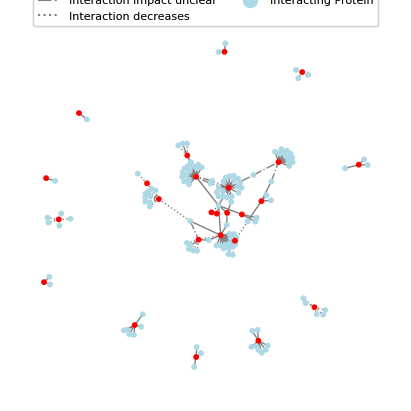

In [4]:
interactions.plot_interaction_network(interacting_node_size = 10)

...and the centrality of proteins in the network



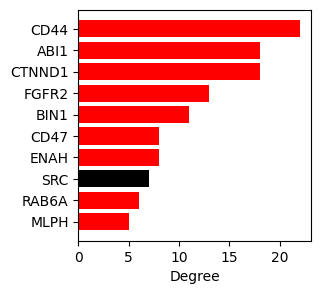

In [5]:
interactions.plot_network_centrality(centrality_measure='Degree')